In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import folium
from folium.plugins import HeatMap

In [2]:
def load_config(path):
    with open(path, 'r') as file:
        return json.load(file)

config_path = '../pandas_config.json'
config = load_config(config_path)
parquet_config = config['parquet']

# setting up the engine as a global constant
ENGINE = parquet_config['engine']
COMPRESSION = parquet_config['compression']
FILE_PATH = "../data/data_parquet"

In [3]:
data = pd.read_parquet(FILE_PATH + "/processed_data_combined.parquet", engine=ENGINE)

##### First few rows of the dataset


In [4]:
data.head()

,id,creation_time,formatted_creation_time,airline_code,flight_number,flight_date,departure_airport,departure_city,departure_country,departure_lat,departure_lon,user_name,action_name,stepID,action_mode,log_level,entry_details,arrival_airport
0,137524484,2024-04-30 04:01:47,30-04-2024 04:01:47,MN,1262,30,DUB,Dublin,IE,53.4213,-6.27007,human,AssignLoadplanAction,a277234c22fa2e5d,Received,INFO,com.systemone.lc2.loadplan.dto.PositionAssignm...,BHX
1,137524940,2024-04-30 04:01:50,30-04-2024 04:01:50,MN,1262,30,DUB,Dublin,IE,53.4213,-6.27007,human,AssignLoadplanAction,3b152cbdf5b057ed,Received,INFO,com.systemone.lc2.loadplan.dto.PositionAssignm...,BHX
2,137524943,2024-04-30 04:01:50,30-04-2024 04:01:50,MN,1262,30,DUB,Dublin,IE,53.4213,-6.27007,human,AssignLoadplanAction,3b152cbdf5b057ed,Saved,INFO,com.systemone.lc2.manualloadplanning.dto.LoadD...,BHX
3,137524964,2024-04-30 04:05:32,30-04-2024 04:05:32,MN,1630,30,DUB,Dublin,IE,53.4213,-6.27007,human,AssignLoadplanAction,52735a0dd84d57d0,Received,INFO,com.systemone.lc2.loadplan.dto.PositionAssignm...,BRU
4,137525021,2024-04-30 04:02:12,30-04-2024 04:02:12,MN,1202,30,DUB,Dublin,IE,53.4213,-6.27007,human,AssignLoadplanAction,8d65801e1dbb10e7,Received,INFO,com.systemone.lc2.loadplan.dto.PositionAssignm...,MAN


##### Basic information about the dataset


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2248299 entries, 0 to 2248298
Data columns (total 18 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   id                       int64         
 1   creation_time            datetime64[ns]
 2   formatted_creation_time  object        
 3   airline_code             object        
 4   flight_number            int64         
 5   flight_date              int64         
 6   departure_airport        object        
 7   departure_city           object        
 8   departure_country        object        
 9   departure_lat            float64       
 10  departure_lon            float64       
 11  user_name                object        
 12  action_name              object        
 13  stepID                   object        
 14  action_mode              object        
 15  log_level                object        
 16  entry_details            object        
 17  arrival_airport          ob


##### Summary statistics of numerical columns


In [6]:
data.describe()

,id,creation_time,flight_number,flight_date,departure_lat,departure_lon
count,2.248299e+06,2248299,2.248299e+06,2.248299e+06,2.247327e+06,2.247327e+06
mean,1.506280e+08,2024-05-03 17:42:30.504103680,2.381134e+03,7.198636e+00,2.812119e+01,7.176243e+00
min,3.376491e+07,2024-04-30 04:01:00,0.000000e+00,1.000000e+00,-3.485510e+01,-1.223754e+02
25%,3.434494e+07,2024-05-01 22:04:36,1.276000e+03,2.000000e+00,1.319790e+01,-3.492360e+01
50%,1.379445e+08,2024-05-03 13:38:19,2.102000e+03,4.000000e+00,2.856650e+01,-6.270070e+00
75%,1.385139e+08,2024-05-05 12:53:16,2.563000e+03,6.000000e+00,5.342130e+01,7.286790e+01
max,3.755673e+08,2024-05-07 09:24:46,9.902000e+03,3.000000e+01,5.391030e+01,1.039940e+02
std,1.183784e+08,NaN,1.498802e+03,8.468916e+00,2.679625e+01,5.283433e+01


##### Summary statistics of categorical columns

In [7]:
data.describe(include=['object'])

,formatted_creation_time,airline_code,departure_airport,departure_city,departure_country,user_name,action_name,stepID,action_mode,log_level,entry_details,arrival_airport
count,2248299,2248299,2248299,2247327,2247327,2248299,2248299,2248299,2248299,2248299,2175157,2167364
unique,147029,3,184,174,18,2,67,353115,3,1,633187,197
top,06-05-2024 23:34:45,MN,DUB,Dublin,IE,service-acco,CalculateWeightAndTrimAction,fe51d57ec7a10eb7,Received,INFO,The message was processed successfully,LHR
freq,266,1108949,839768,839768,862584,1948755,744772,46,1168374,2248299,216905,150777


##### check for missing values


In [8]:
data.isnull().sum()

id                             0
creation_time                  0
formatted_creation_time        0
airline_code                   0
flight_number                  0
flight_date                    0
departure_airport              0
departure_city               972
departure_country            972
departure_lat                972
departure_lon                972
user_name                      0
action_name                    0
stepID                         0
action_mode                    0
log_level                      0
entry_details              73142
arrival_airport            80935
dtype: int64

##### Analyze 'action_name' column


In [9]:
data['action_name'].value_counts()

action_name
CalculateWeightAndTrimAction        744772
StorePaxDataAction                  390862
CheckinMsgProcessor                 264896
TransferCheckinDataAction            85186
CrewMsgProcessor                     69552
                                     ...  
CreateAndSendUldOrdMessageAction        30
CopyPaxLoadDataAction                    4
CopyPaxDataAction                        4
CopyLoadItemsAction                      2
CopyCargoTableAction                     2
Name: count, Length: 67, dtype: int64

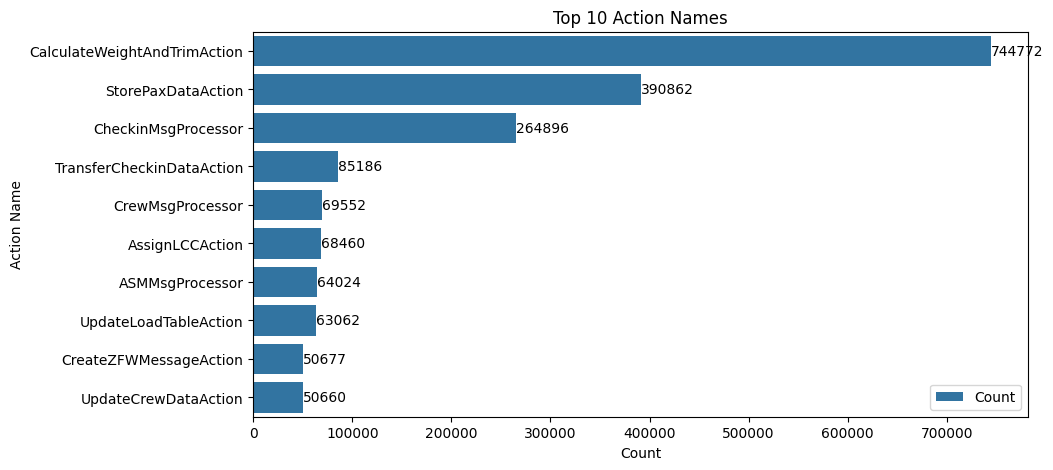

In [10]:
# plot the top 10 action names
plt.figure(figsize=(10, 5))
top_10_actions = data['action_name'].value_counts().head(10)
ax = sns.countplot(y=data['action_name'], order=top_10_actions.index)

# add title and labels
plt.title('Top 10 Action Names')
plt.xlabel('Count')
plt.ylabel('Action Name')

# add counts on the bars
for index, value in enumerate(top_10_actions):
    ax.text(value, index, str(value), va='center')

# add legend
plt.legend(['Count'], loc='lower right')

# show the plot
plt.show()


# Ratio: Actions performed by humans and service accounts

In [11]:
user_ratio = data["user_name"].value_counts(normalize=True).to_frame().to_csv("../data/data_visualization/user_ratio.csv")

# Top actions

In [12]:
top_actions = data["action_name"].value_counts().to_frame().reset_index()

In [13]:
# create a dataframe with departure locations
locations = data[['departure_lat', 'departure_lon']].dropna()

# initialize a map
map = folium.Map(location=[locations['departure_lat'].mean(), locations['departure_lon'].mean()], zoom_start=5)

# add heatmap layer
HeatMap(data=locations.values, radius=15).add_to(map)

# display the map
map.save("departure_heatmap.html")


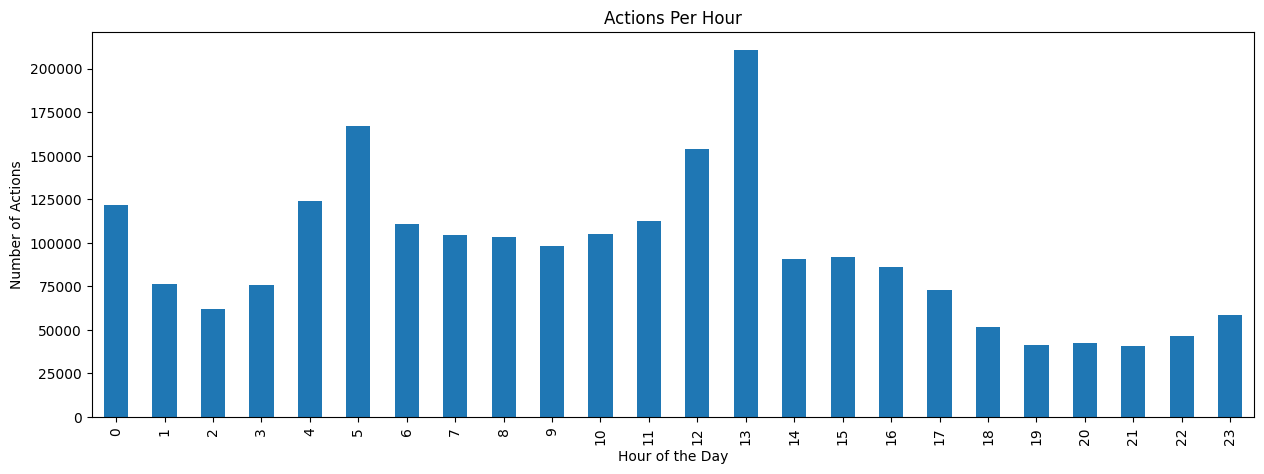

In [14]:
# convert creation_time to datetime
data['creation_time'] = pd.to_datetime(data['creation_time'])

# extract date and hour
data['date'] = data['creation_time'].dt.date
data['hour'] = data['creation_time'].dt.hour

# count actions per hour
actions_per_hour = data.groupby('hour').size()

# plot actions per hour
plt.figure(figsize=(15, 5))
actions_per_hour.plot(kind='bar')
plt.title('Actions Per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Actions')
plt.show()


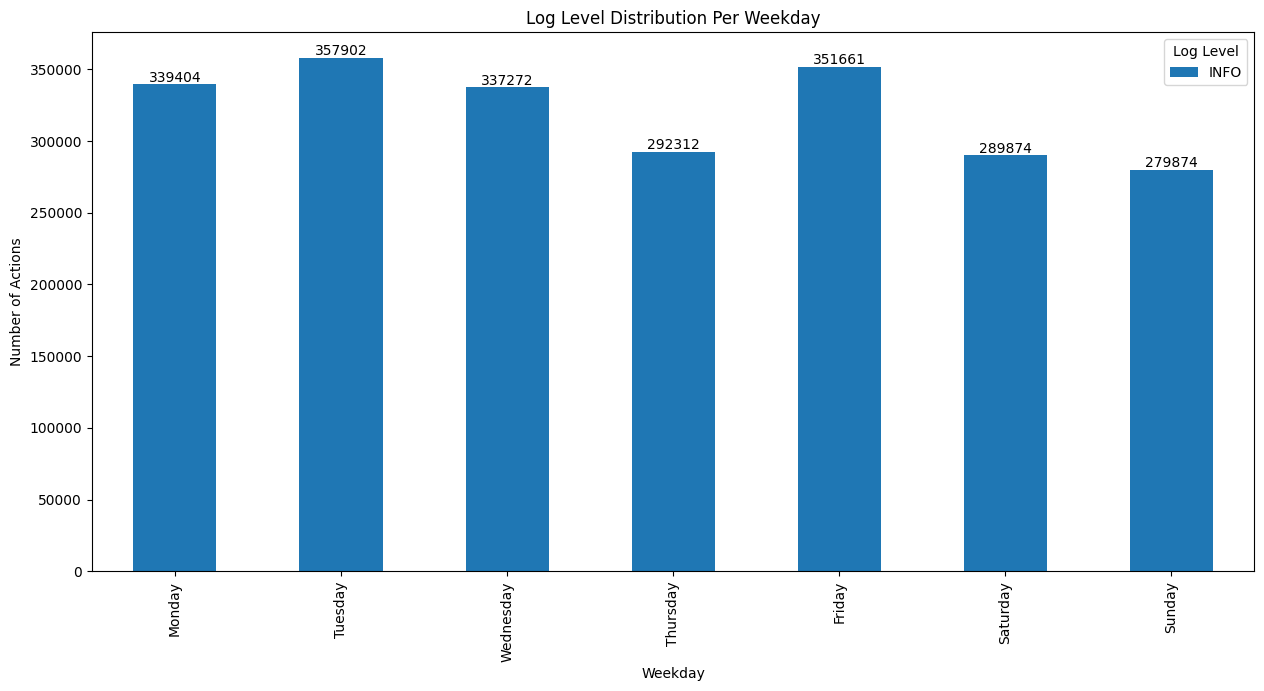

In [18]:
# make sure 'creation_time' is a datetime column
data['creation_time'] = pd.to_datetime(data['creation_time'])

# extract the weekday from the 'creation_time' column
data['weekday'] = data['creation_time'].dt.day_name()

# define the order of the weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# count log levels per weekday
log_level_weekday_counts = data.groupby(['weekday', 'log_level']).size().unstack().reindex(weekday_order)

# plot log level distribution per weekday
ax = log_level_weekday_counts.plot(kind='bar', stacked=True, figsize=(15, 7))

# add title and labels
plt.title('Log Level Distribution Per Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Actions')
plt.legend(title='Log Level')

# add counts on the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

# show the plot
plt.show()

Anzahl einzigartiger Flugnummern: 2044


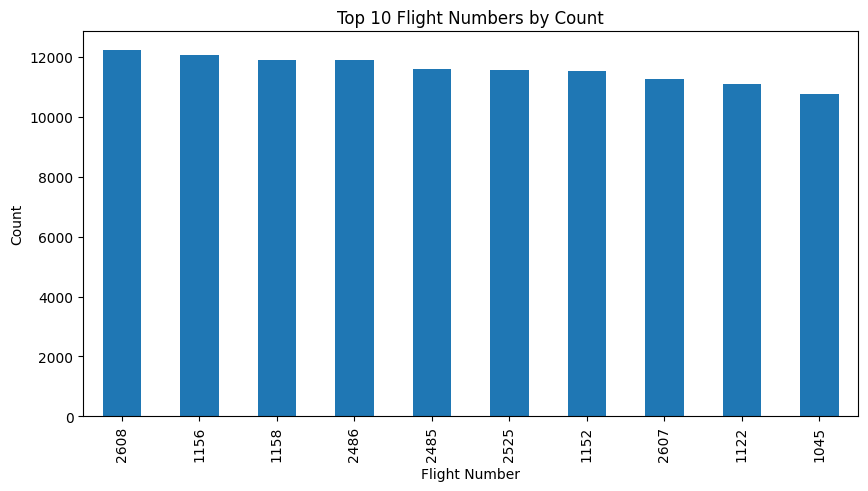

In [20]:
# count unique flight numbers
unique_flight_numbers = data['flight_number'].nunique()
print(f'Anzahl einzigartiger Flugnummern: {unique_flight_numbers}')

# count occurrences of each flight number
flight_number_counts = data['flight_number'].value_counts()

# plot the top 10 most frequent flight numbers
plt.figure(figsize=(10, 5))
flight_number_counts.head(10).plot(kind='bar')
plt.title('Top 10 Flight Numbers by Count')
plt.xlabel('Flight Number')
plt.ylabel('Count')
plt.show()


In [35]:
# number of unique airlines
unique_airlines = data['airline_code'].unique()
num_unique_airlines = len(unique_airlines)

print(f"Number of unique airlines: {num_unique_airlines}")
print("___________________________________")

print(f"Unique airlines: {unique_airlines}")
print("___________________________________")

# number of unique flight numbers per airline
airline_flight_numbers = data.groupby('airline_code')['flight_number'].nunique()
print(f"Number of unique flight numbers per airline:\n{airline_flight_numbers}")

print("___________________________________")

# analyze routes per airline
data['route'] = data['departure_airport'] + ' -> ' + data['arrival_airport']

# drop duplicate flight numbers for each route
unique_flights = data.drop_duplicates(subset=['flight_number', 'route'])

# count the number of flights per route
route_counts = unique_flights['route'].value_counts().reset_index()
route_counts.columns = ['route', 'count']
print(f"Number of flights per route:\n{route_counts.head()}")

print("___________________________________")

# number of routes per airline
airline_routes = unique_flights.groupby('airline_code')['route'].unique()
print(f"Routes per airline:\n{airline_routes}")

print("___________________________________")

# count the number of flights per route for each airline
airline_route_counts = unique_flights.groupby(['airline_code', 'route']).size().reset_index(name='count')

# display the top routes for each airline
for airline in unique_airlines:
    top_routes = airline_route_counts[airline_route_counts['airline_code'] == airline].nlargest(5, 'count')
    print(f"Top routes for airline {airline}:\n{top_routes}\n")


Number of unique airlines: 3
___________________________________
Unique airlines: ['MN' 'AB' 'ZY']
___________________________________
Number of unique flight numbers per airline:
airline_code
AB     163
MN     201
ZY    1695
Name: flight_number, dtype: int64
___________________________________
Number of flights per route:
        route  count
0  VCP -> JTC     32
1  VCP -> FLL     27
2  CGH -> SDU     19
3  SDU -> CGH     18
4  DUB -> LHR     15
___________________________________
Routes per airline:
airline_code
AB    [BLR -> DEL, BLR -> BOM, BOM -> BLR, BOM -> DE...
MN    [DUB -> BHX, DUB -> BRU, DUB -> MAN, DUB -> CD...
ZY    [BVB -> MAO, NAT -> VCP, SSA -> VCP, REC -> SS...
Name: route, dtype: object
___________________________________
Top routes for airline MN:
    airline_code       route  count
128           MN  DUB -> LHR     15
93            MN  DUB -> AGP      5
107           MN  DUB -> CDG      5
95            MN  DUB -> AMS      4
117           MN  DUB -> FAO      4

Top r

##### User Activity Analysis

/var/folders/vm/vj250x0s5q9bj_4nnx_z8mcc0000gn/T/ipykernel_92025/1115411358.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='user_name', y='activity_count', data=user_activity, palette='viridis')


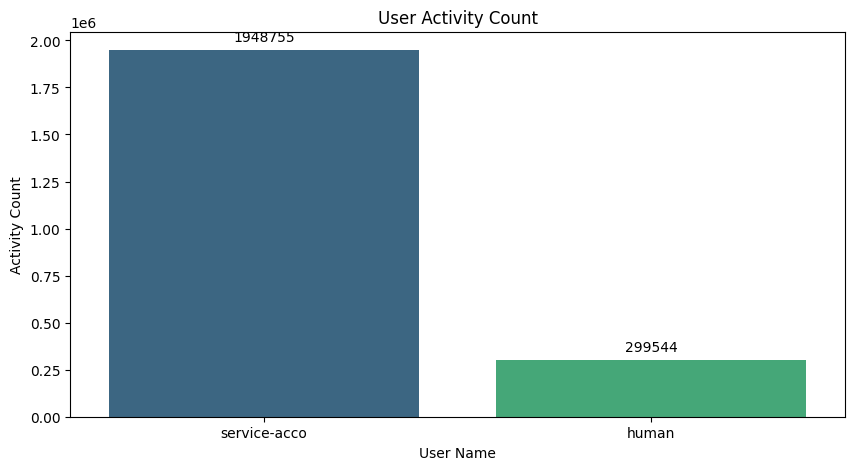

In [17]:
# count actions per user
user_activity = data['user_name'].value_counts().reset_index()
user_activity.columns = ['user_name', 'activity_count']

# plot the activity count for each user
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='user_name', y='activity_count', data=user_activity, palette='viridis')

# add text labels on the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.title('User Activity Count')
plt.xlabel('User Name')
plt.ylabel('Activity Count')
plt.show()


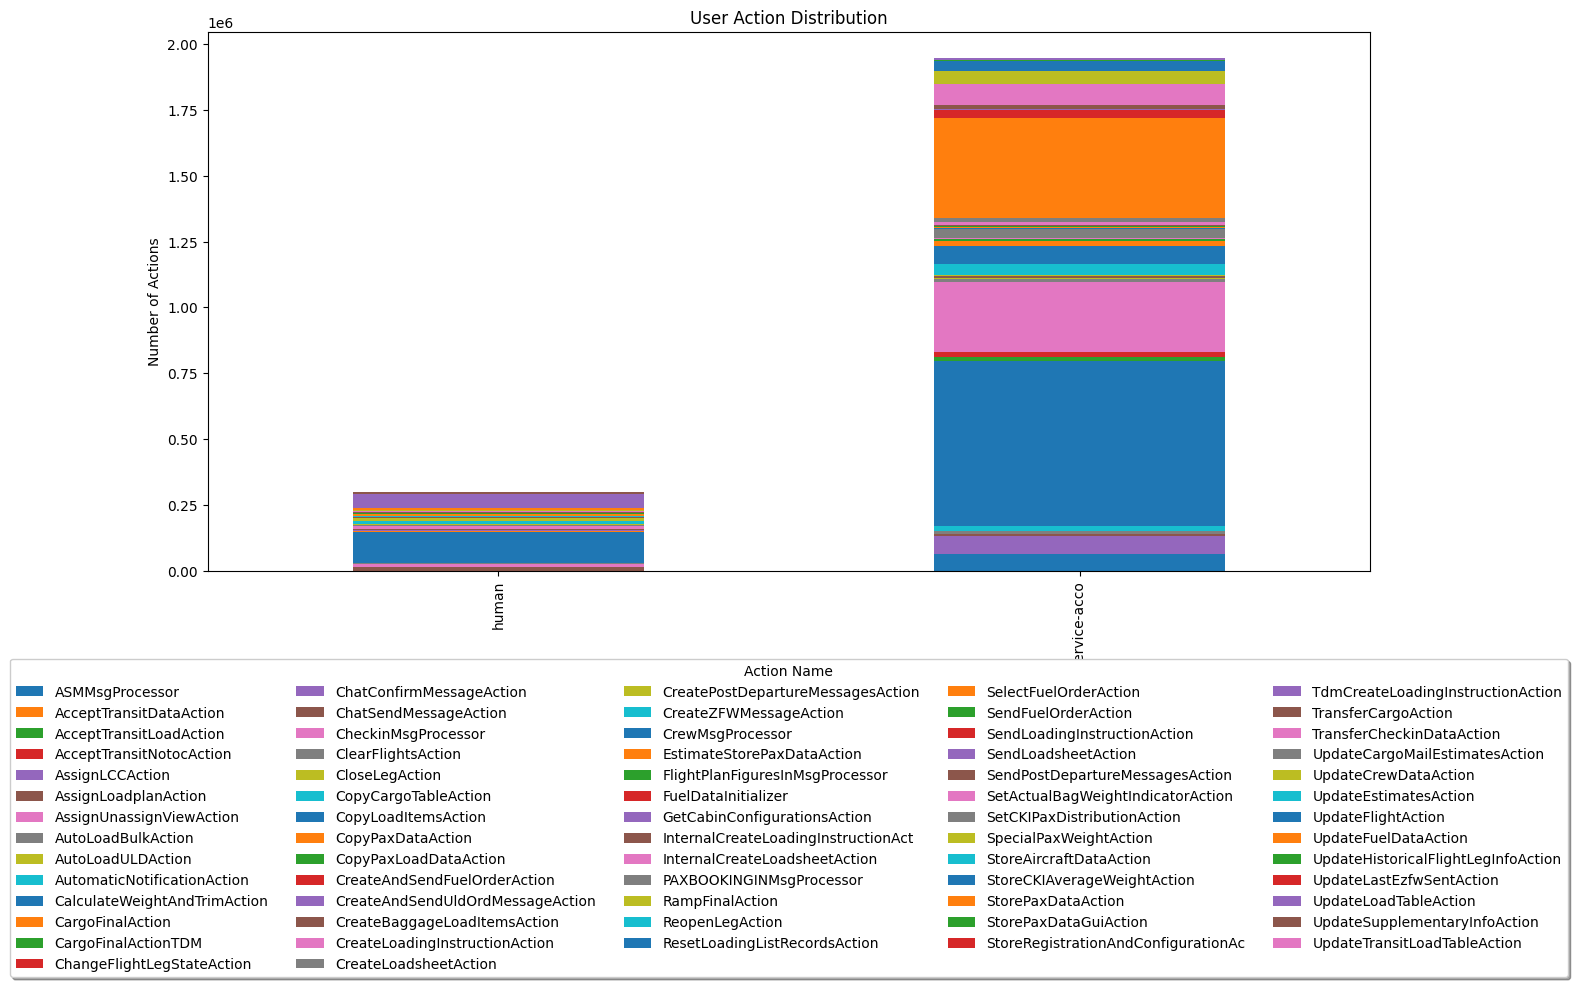

<Figure size 1500x700 with 0 Axes>

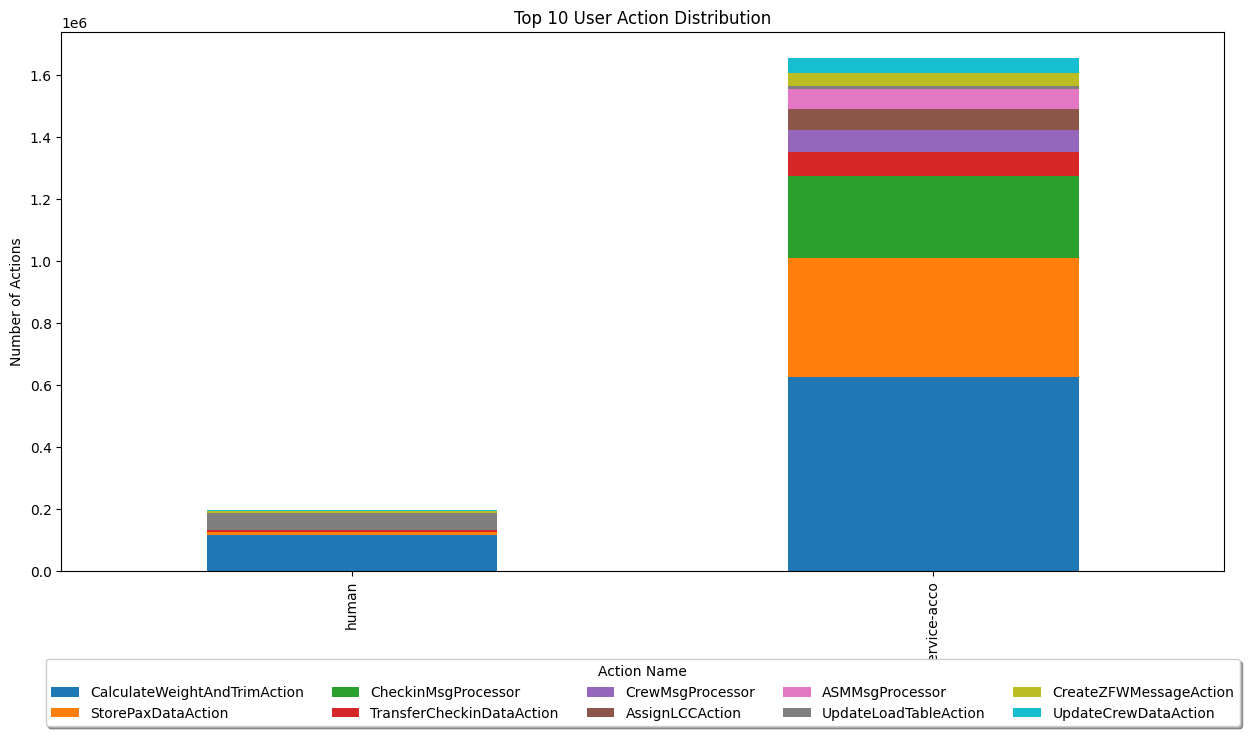

In [54]:
# count actions by type for each user
user_action_counts = data.groupby(['user_name', 'action_name']).size().unstack().fillna(0)

# plot action distribution for each user
ax = user_action_counts.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('User Action Distribution')
plt.xlabel('User Name')
plt.ylabel('Number of Actions')

# move legend below the plot and make it horizontal
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5, title='Action Name')

# show the plot
plt.show()


# get the top 10 most frequent actions
top_n = 10
top_actions = user_action_counts.sum().nlargest(top_n).index

# filter the dataframe to include only the top actions
top_user_action_counts = user_action_counts[top_actions]

# plot action distribution for each user
plt.figure(figsize=(15, 7))
top_user_action_counts.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title(f'Top {top_n} User Action Distribution')
plt.xlabel('User Name')
plt.ylabel('Number of Actions')

# move legend below the plot and make it horizontal
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.15),
           fancybox=True, shadow=True, ncol=5, title='Action Name')

plt.show()

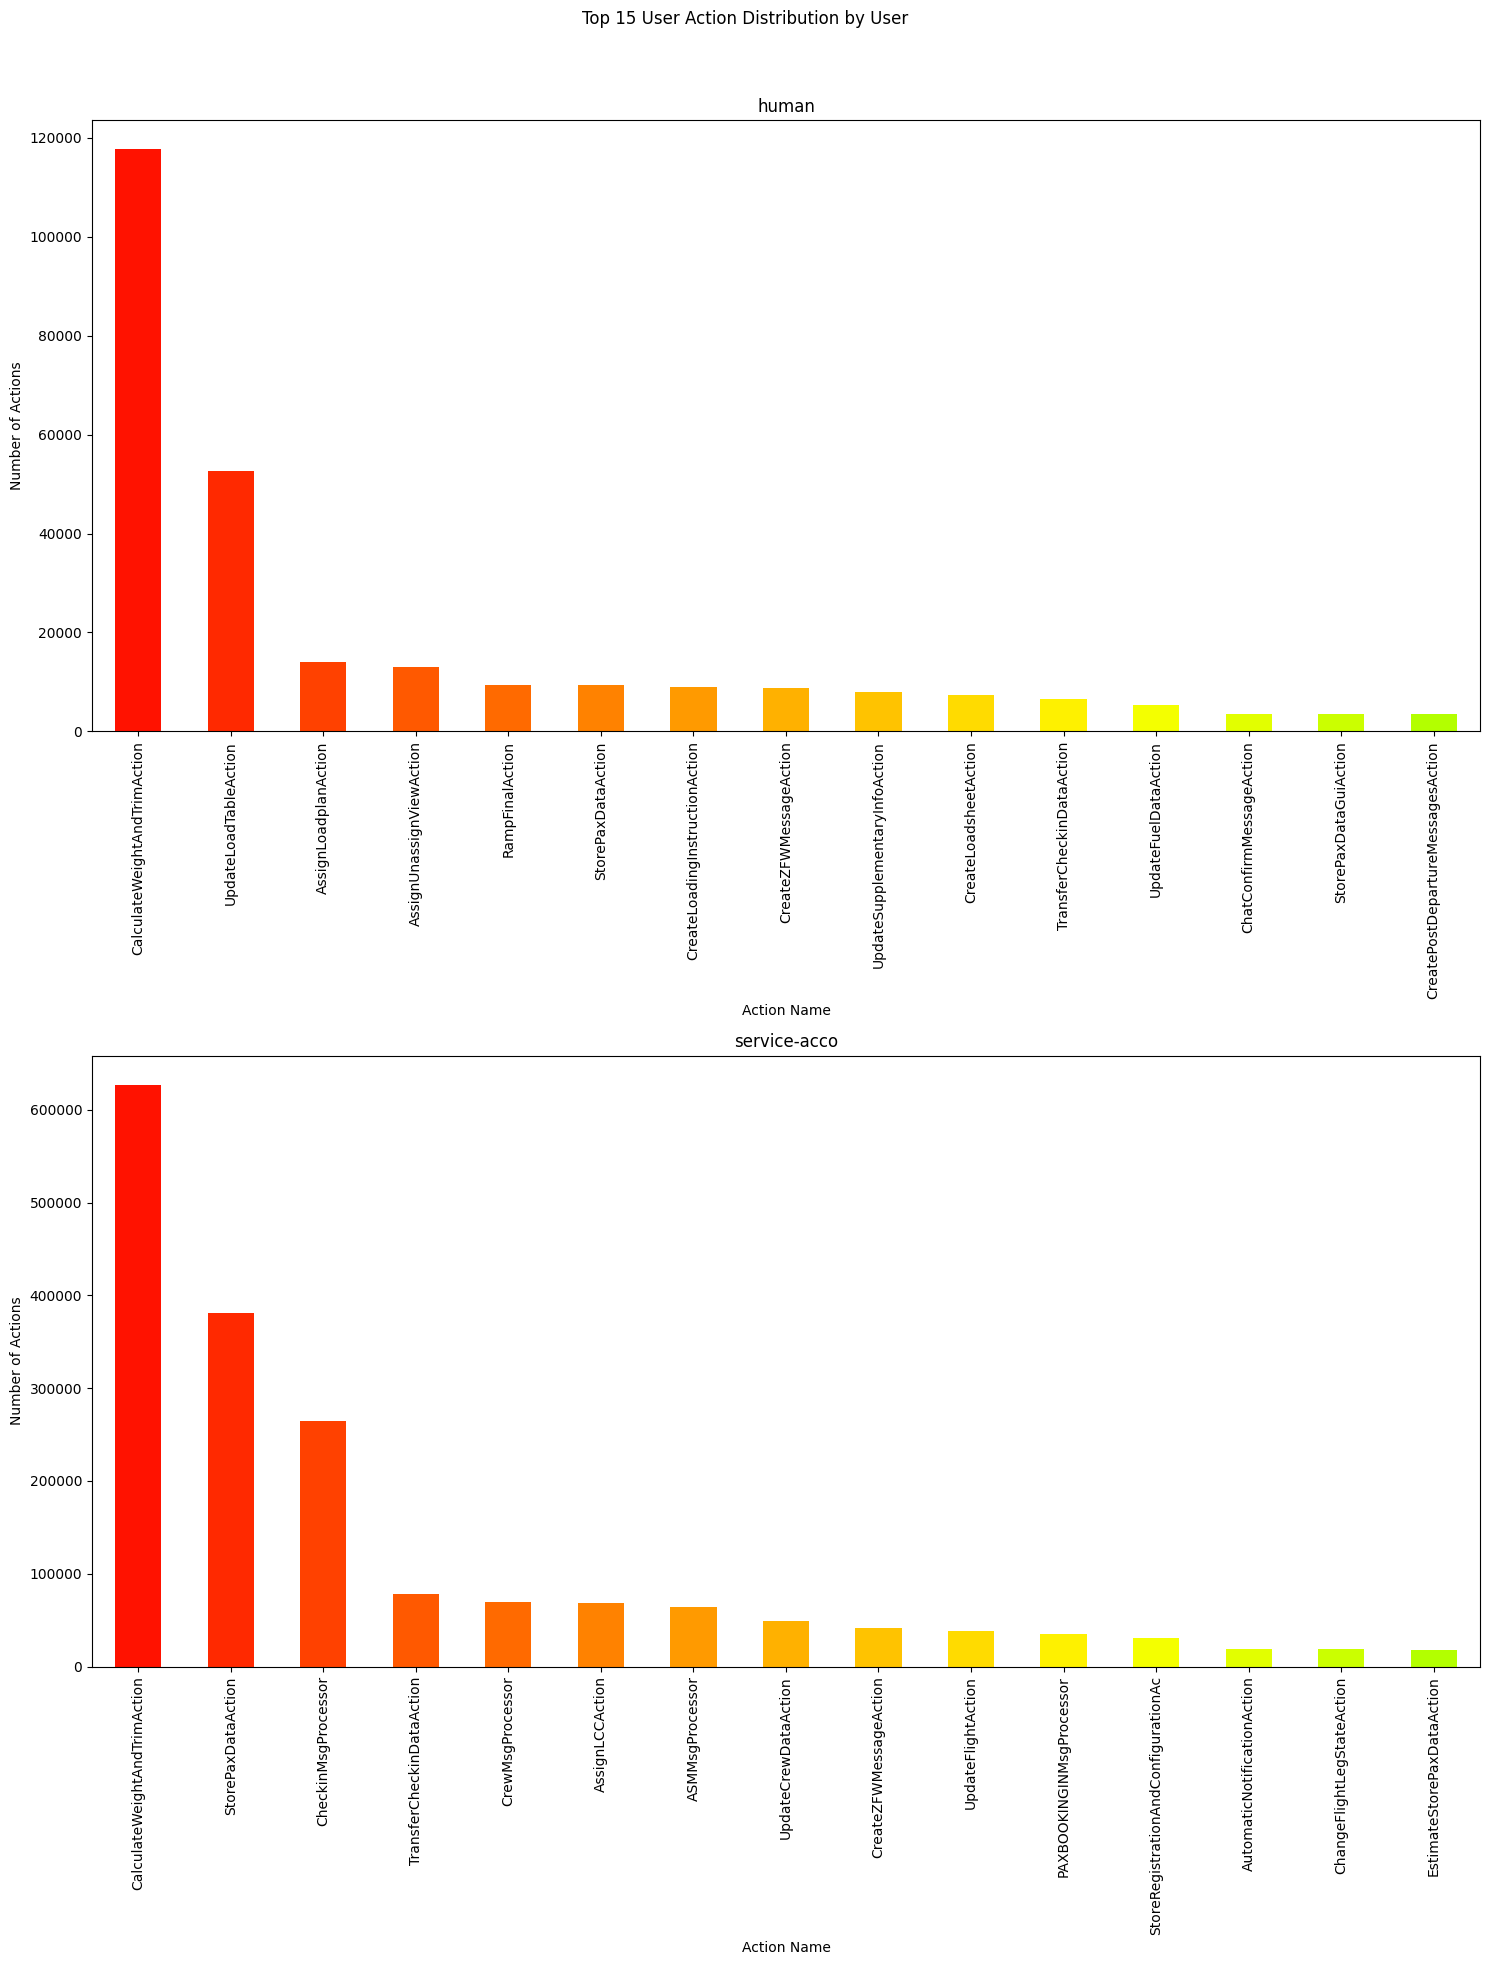

In [53]:
# count actions by type for each user
user_action_counts = data.groupby(['user_name', 'action_name']).size().unstack().fillna(0)

# get the top 15 most frequent actions for each user individually
top_user_actions = user_action_counts.apply(lambda x: x.nlargest(15).index, axis=1)

# create faceted bar charts with separate x-axes for each user's top 15 actions
fig, axes = plt.subplots(len(user_action_counts.index), 1, figsize=(15, 20), sharex=False)

# create a color palette
num_actions = user_action_counts.shape[1]
palette = sns.color_palette("hsv", num_actions)

for i, user in enumerate(user_action_counts.index):
    # filter to only the top 15 actions for this user
    top_actions = top_user_actions.loc[user]
    user_data = user_action_counts.loc[user, top_actions]
    
    user_data.plot(kind='bar', ax=axes[i], color=palette[:len(top_actions)])
    axes[i].set_title(user)
    axes[i].set_xlabel('Action Name')
    axes[i].set_ylabel('Number of Actions')
    axes[i].tick_params(axis='x', rotation=90)

plt.suptitle('Top 15 User Action Distribution by User')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [20]:
# count actions by type for each user
user_action_counts = data.groupby(['user_name', 'action_name']).size().unstack().fillna(0)

# calculate the total number of actions for each action
total_action_counts = user_action_counts.sum(axis=0)

# calculate the percentage of each user's actions for each action
user_action_percentage = user_action_counts.div(total_action_counts, axis=1) * 100

user_action_percentage

action_name,ASMMsgProcessor,AcceptTransitDataAction,AcceptTransitLoadAction,AcceptTransitNotocAction,AssignLCCAction,AssignLoadplanAction,AssignUnassignViewAction,AutoLoadBulkAction,AutoLoadULDAction,AutomaticNotificationAction,...,UpdateCargoMailEstimatesAction,UpdateCrewDataAction,UpdateEstimatesAction,UpdateFlightAction,UpdateFuelDataAction,UpdateHistoricalFlightLegInfoAction,UpdateLastEzfwSentAction,UpdateLoadTableAction,UpdateSupplementaryInfoAction,UpdateTransitLoadTableAction
user_name,,,,,,,,,,,,,,,,,,,,,
human,0.0,100.0,100.0,100.0,0.651475,69.386439,99.66384,7.189295,56.068268,0.0,...,100.0,2.854323,100.0,0.508546,61.873027,55.362156,70.731707,83.41632,100.0,100.0
service-acco,100.0,0.0,0.0,0.0,99.348525,30.613561,0.33616,92.810705,43.931732,100.0,...,0.0,97.145677,0.0,99.491454,38.126973,44.637844,29.268293,16.58368,0.0,0.0


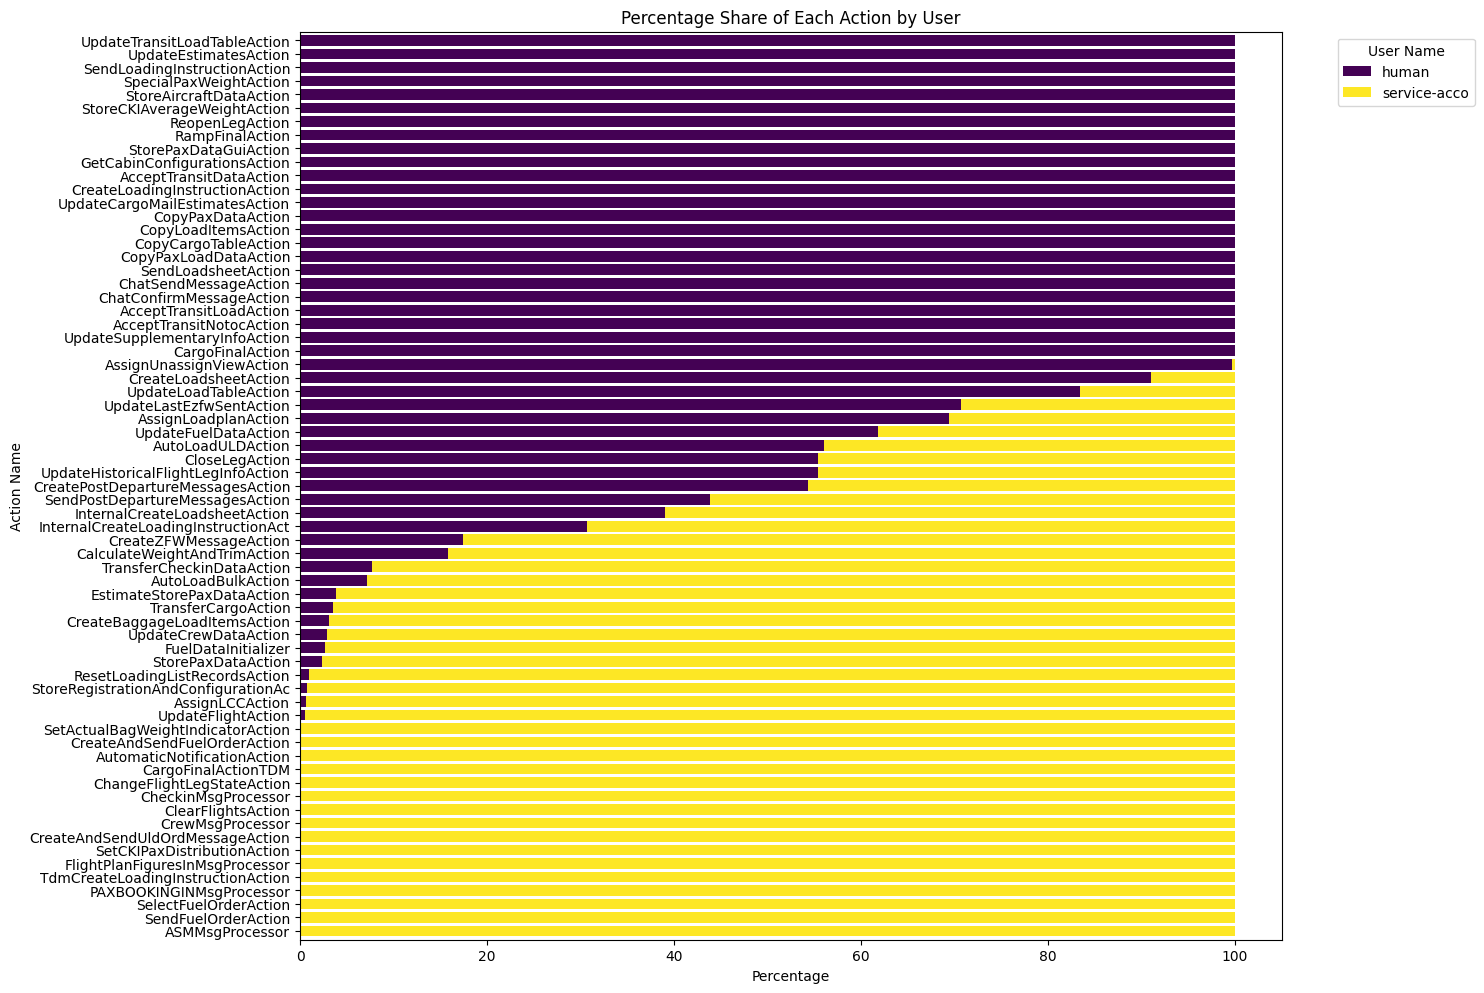

The number of actions included in the visualization is: 67


In [33]:

# sort actions by the percentage of 'human' or 'service-acco'
# choose the user to sort by, for example 'human'
user_to_sort_by = 'human'
sorted_actions = user_action_percentage.T.sort_values(by=user_to_sort_by, ascending=False).index

# plot the percentage share of each action by each user with swapped axes and increased spacing
fig, ax = plt.subplots(figsize=(15, 10))
user_action_percentage[sorted_actions].T.plot(kind='barh', stacked=True, ax=ax, colormap='viridis', width=0.8)

# add title and labels
plt.title('Percentage Share of Each Action by User')
plt.xlabel('Percentage')
plt.ylabel('Action Name')
plt.legend(title='User Name', bbox_to_anchor=(1.05, 1), loc='upper left')

# add more spacing between the bars
ax.set_yticks([i for i in range(len(sorted_actions))])
ax.set_yticklabels(sorted_actions, ha='right')
plt.gca().invert_yaxis()

# adjust layout for more spacing
plt.tight_layout(pad=0.95)
plt.show()

# Count the number of actions included in the visualization
num_actions_in_visualization = len(sorted_actions)

print(f'The number of actions included in the visualization is: {num_actions_in_visualization}')
